# flygym dev-v1.0.0 tutorial

In this tutorial, we will learn the basics of using the new API introduced in flygym v1.0.

The major changes introduced by this update are:
- refactoring: the `NeuroMechFly` has been split into `Fly`, `Camera`, and `Simulation` (or `SingleFlySimulation`).
- new features: multi-fly simulation, multi-camera rendering, etc.
- new examples: path integration, integrating connectome constrained model for vision, head stabilization, etc.
- bug fixes: e.g., fixed issue with camera not rotating according to the fly's orientation.

# Installation
To install the new version of flygym, execute the commands below in a terminal:

```sh
git clone https://github.com/NeLy-EPFL/flygym.git flygym-v1
cd flygym-v1
git checkout dev-v1.0.0
conda create -y -n flygym-v1 python=3.11
conda activate flygym-v1
pip install -e ".[dev]"
```

The commands above basically
- clone the `flygym` repository to a new directory named `flygym-v1` (to avoid conflict with the presumably existing `flygym` directory)
- change the working directory to `flygym-v1`
- switch to the `dev-v1.0.0` branch
- create a new virtual environment named `flygym-v1` (to avoid conflict with the presumably existing `flygym` environment)
- activate the `flygym-v1` environment (do this every time before you use the new `flygym` version)
- install the new version of the `flygym` package

In [1]:
from pathlib import Path
import pickle
import numpy as np
from tqdm import trange

save_dir = Path("outputs")
save_dir.mkdir(exist_ok=True)

To get started, let's do a simply kinematic reply (same as what we did in [week 1](https://github.com/NeLy-EPFL/cobar-exercises/blob/main/week1/gym_basics_and_kinematic_replay.ipynb)) with the new API. We start by loading the joint angles data:

In [2]:
# note that flygym.mujoco.<module> has been renamed to flygym.<module>
# (e.g., flygym.mujoco.preprogrammed -> flygym.preprogrammed)
from flygym.preprogrammed import all_leg_dofs
from flygym.util import get_data_path

run_time = 0.5
timestep = 1e-4
actuated_joints = all_leg_dofs

data_path = get_data_path("flygym", "data")
render_mode="saved"
render_playspeed=0.2, 
draw_contacts=True
with open(data_path / "behavior" / "210902_pr_fly1.pkl", "rb") as f:
    data = pickle.load(f)
with open(data_path / "behavior" / "210902_pr_fly1.pkl", "rb") as f:
    data1=pickle.load(f)


In [3]:
data["joint_LFCoxa"]=np.concatenate([np.linspace(0, 0, 100),np.linspace(0, 0, 100),np.linspace(0, 0, 100),np.linspace(0, 0, 100)]).tolist()
data["joint_LFCoxa_roll"]=np.concatenate([np.linspace(0, 0.8, 100),np.linspace(0.8, 0.8, 100),np.linspace(0.8, 0.8,100),np.linspace(0.8, 0.3, 100)]).tolist()
data["joint_LFCoxa_yaw"]=np.concatenate([np.linspace(1.5,1.5, 100),np.linspace(1.5,1.5, 100),np.linspace(1.5,1.5, 100),np.linspace(1.5, 1.5, 100)]).tolist()
data["joint_LFFemur"]=np.concatenate([np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5,100),np.linspace(-1.5, -1.5, 100)]).tolist()
data["joint_LFFemur_roll"]=np.concatenate([np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5,100),np.linspace(-1.5,-1.5, 100),np.linspace(-1.5,-1.5, 100)]).tolist()
data["joint_LFTibia"]=np.concatenate([np.linspace(-1.17,-1.1, 100),np.linspace(-1.1,-1.1 ,100),np.linspace(-1.1,-1.1, 100),np.linspace(-1.1, -0.9, 100)]).tolist()
data["joint_LFTarsus1"]=np.concatenate([np.linspace(-1.5,-0.21 ,100),np.linspace(-0.2,0, 100),np.linspace(0,0, 100),np.linspace(0, -0.6, 100)]).tolist()

data["joint_LMCoxa"]=np.concatenate([np.linspace(0.11,0.12, 100),np.linspace(0.12,0.8, 100),np.linspace(0.8,1, 100),np.linspace(1, -0.6, 100)]).tolist()
data["joint_LMCoxa_roll"]=np.concatenate([np.linspace(0.1,0.1 ,100),np.linspace(0.1,0.1,100),np.linspace(0.1,0.1 ,100),np.linspace(0.1, 0.1, 100)]).tolist()
data["joint_LMCoxa_yaw"]=np.concatenate([np.linspace(0.4,0.4, 100),np.linspace(0.4,0.4, 100),np.linspace(0.4,0.6, 100),np.linspace(0.6, 0.4, 100)]).tolist()
data["joint_LMFemur"]=np.concatenate([np.linspace(-1.98,-0.698 , 100),np.linspace(-0.698,-0.428, 100),np.linspace(-0.428,-0.428,100),np.linspace(-0.428, -0.498, 100)]).tolist()
data["joint_LMFemur_roll"]=np.concatenate([np.linspace(0,0 , 100,),np.linspace(0,0, 100),np.linspace(0,0 , 100),np.linspace(0, 0,100)]).tolist()
data["joint_LMTibia"]=np.concatenate([np.linspace(1.74,0.5, 100),np.linspace(0.5,0.2, 100),np.linspace(0.2,0.2, 100),np.linspace(0.2,1.5, 100)]).tolist()
data["joint_LMTarsus1"]=np.concatenate([np.linspace(-0.2,-0.33 ,100),np.linspace(-0.33,-0.1, 100),np.linspace(-0.1,-0.1 ,100),np.linspace(-0.1, -1.2, 100)]).tolist()

data["joint_LHCoxa"]=np.concatenate([np.linspace(0.4,0.21, 100),np.linspace(0.21,-0.2, 100),np.linspace(-0.2,-0.2, 100),np.linspace(-0.2, 0.6, 100)]).tolist()
data["joint_LHCoxa_roll"]=np.concatenate([np.linspace(2.5,2.5,100),np.linspace(2.5,2.5, 100),np.linspace(2.5,2.6, 100),np.linspace(2.61, 2.61, 100)]).tolist()
data["joint_LHCoxa_yaw"]=np.concatenate([np.linspace(-0.07,0.2,100),np.linspace(0.2,0.2, 100),np.linspace(0.2, 0.2, 100),np.linspace(0.2, 0.4, 100)]).tolist()
data["joint_LHFemur"]=np.concatenate([np.linspace(-1.01,-1.82 ,100),np.linspace(-1.82,-1.2, 100),np.linspace(-1.2,-1.2 ,100),np.linspace(-1.2, -0.2, 100)]).tolist()
data["joint_LHFemur_roll"]=np.concatenate([np.linspace(0,0 , 100),np.linspace(0,0, 100),np.linspace(0,0 , 100),np.linspace(0, 0, 100)]).tolist()
data["joint_LHTibia"]=np.concatenate([np.linspace(2.07,2.15, 100),np.linspace(2.15,0.1, 100),np.linspace(0.1,0.1, 100),np.linspace(0.1, 0.1, 100)]).tolist()
data["joint_LHTarsus1"]=np.concatenate([np.linspace(-1,-1.1, 100),np.linspace(-1.1,-0.2, 100),np.linspace(-0.2,-0.2,100),np.linspace(-0.2, -0.2, 100)]).tolist()


data["joint_RFCoxa"]=data["joint_LFCoxa"]
data["joint_RFCoxa_roll"]=[-x for x in data["joint_LFCoxa_roll"]]
data["joint_RFCoxa_yaw"]=[-x for x in data["joint_LFCoxa_yaw"]]
data["joint_RFFemur"]=data["joint_LFFemur"]
data["joint_RFFemur_roll"]=[-x for x in data["joint_LFFemur_roll"]]
data["joint_RFTibia"]=data["joint_LFTibia"]
data["joint_RFTarsus1"]=data["joint_LFTarsus1"]

data["joint_RMCoxa"]=data["joint_LMCoxa"]
data["joint_RMCoxa_roll"]=[-x for x in data["joint_LMCoxa_roll"]]
data["joint_RMCoxa_yaw"]=[-x for x in data["joint_LMCoxa_yaw"]]
data["joint_RMFemur"]=data["joint_LMFemur"]
data["joint_RMFemur_roll"]=[-x for x in data["joint_LMFemur_roll"]]
data["joint_RMTibia"]=data["joint_LMTibia"]
data["joint_RMTarsus1"]=data["joint_LMTarsus1"]

data["joint_RHCoxa"]=data["joint_LHCoxa"]
data["joint_RHCoxa_roll"]=[-x for x in data["joint_LHCoxa_roll"]]
data["joint_RHCoxa_yaw"]=[-x for x in data["joint_LHCoxa_yaw"]]
data["joint_RHFemur"]=data["joint_LHFemur"]
data["joint_RHFemur_roll"]=[-x for x in data["joint_LHFemur_roll"]]
data["joint_RHTibia"]=data["joint_LHTibia"]
data["joint_RHTarsus1"]=data["joint_LHTarsus1"]


In [4]:
target_num_steps = int(run_time / timestep)
data_block = np.zeros((len(actuated_joints), target_num_steps))
input_t = np.arange(len(data["joint_LFCoxa"])) * data["meta"]["timestep"]
output_t = np.arange(target_num_steps) * timestep

for i, joint in enumerate(actuated_joints):
    data_block[i, :] = np.interp(output_t, input_t, data[joint])


data_block1 = np.zeros((len(actuated_joints), target_num_steps))
input_t = np.arange(len(data1["joint_LFCoxa"])) * data1["meta"]["timestep"]
output_t = np.arange(target_num_steps) * timestep
for i, joint in enumerate(actuated_joints):
    data_block1[i, :] = np.interp(output_t, input_t, data1[joint])

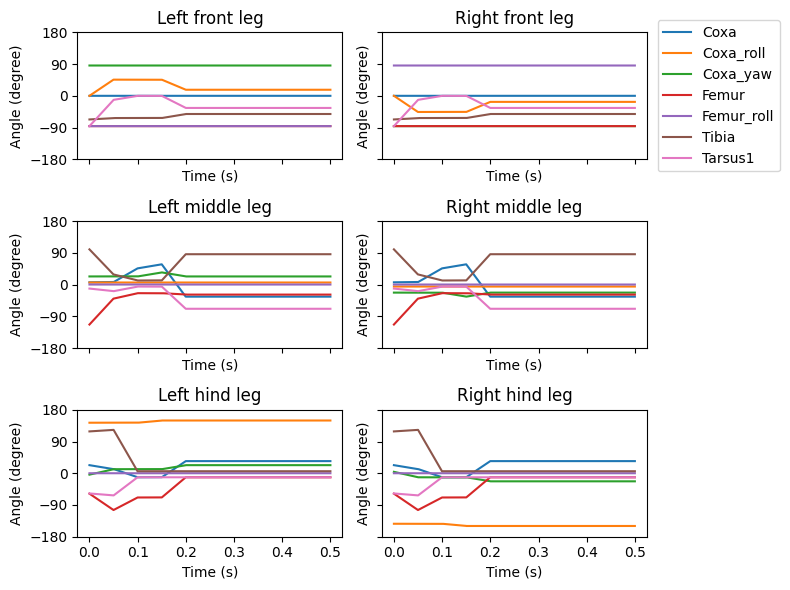

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(
    3, 2, figsize=(8, 6), sharex=True, sharey=True, tight_layout=True
)
legs = [
    f"{side} {pos} leg"
    for pos in ["front", "middle", "hind"]
    for side in ["Left", "Right"]
]
for i, leg in enumerate(legs):
    ax = axs.flatten()[i]
    leg_code = f"{leg.split()[0][0]}{leg.split()[1][0]}".upper()
    for j, dof in enumerate(actuated_joints):
        if dof.split("_")[1][:2] != leg_code:
            continue
        ax.plot(output_t, np.rad2deg(data_block[j, :]), label=dof[8:])
    ax.set_ylim(-180, 180)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle (degree)")
    ax.set_yticks([-180, -90, 0, 90, 180])
    ax.set_title(leg)
    if leg == "Right front leg":
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

# Single fly simulation
Previously, all the attributes and methods of the simulation were included in the `NeuroMechFly` class. To improve cohesion and modularity, it has been restructured into 3 classes: `Fly`, `Camera`, and `SingleFlySimulation`. Let's import them instead:

In [6]:
from flygym import Fly, Camera, SingleFlySimulation

In [7]:
'''
# most of the parameters previously passed to Parameters are now passed to Fly.
# check the documentation for more details.
fly = Fly(
    init_pose="stretch",
    actuator_kp=30,
    actuated_joints=actuated_joints

    )
cam = Camera(
    fly=fly,
    camera_id="Animat/camera_top_right",
)

sim = SingleFlySimulation(
    fly=fly,
    cameras=[cam],
)
obs, info = sim.reset()

for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = sim.step(action)
    sim.render()

# note that save_video is a method of Camera instead of Simulation
cam.save_video(save_dir / "single_fly.mp4")
'''

'\n# most of the parameters previously passed to Parameters are now passed to Fly.\n# check the documentation for more details.\nfly = Fly(\n    init_pose="stretch",\n    actuator_kp=30,\n    actuated_joints=actuated_joints\n\n    )\ncam = Camera(\n    fly=fly,\n    camera_id="Animat/camera_top_right",\n)\n\nsim = SingleFlySimulation(\n    fly=fly,\n    cameras=[cam],\n)\nobs, info = sim.reset()\n\nfor i in trange(target_num_steps):\n    joint_pos = data_block[:, i]\n    action = {"joints": joint_pos}\n    obs, reward, terminated, truncated, info = sim.step(action)\n    sim.render()\n\n# note that save_video is a method of Camera instead of Simulation\ncam.save_video(save_dir / "single_fly.mp4")\n'

In [8]:

from IPython.display import Video
''''
Video(str(save_dir / "single_fly.mp4"))
'''

'\'\nVideo(str(save_dir / "single_fly.mp4"))\n'

# Multi-camera rendering
It is also possible to pass multiple cameras to `SingleFlySimulation`:

In [9]:
''''
import imageio

fly = Fly(
    spawn_pos=(0, 0, 1),
    actuated_joints=actuated_joints,
)

cameras = [
    Camera(fly=fly, camera_id=f"Animat/camera_{side}", window_size=(256, 256))
    for side in ["left", "right", "top", "front"]
]

sim = SingleFlySimulation(
    fly=fly,
    cameras=cameras,
)
obs, info = sim.reset()

with imageio.get_writer(save_dir / "multiview.mp4", fps=cameras[0].fps) as writer:
    for i in trange(target_num_steps):
        joint_pos = data_block[:, i]
        action = {"joints": joint_pos}
        obs, reward, terminated, truncated, info = sim.step(action)
        images = sim.render()

        if all(i is not None for i in images):
            frame = np.concatenate(images, axis=1)
            writer.append_data(frame)
            '''

'\'\nimport imageio\n\nfly = Fly(\n    spawn_pos=(0, 0, 1),\n    actuated_joints=actuated_joints,\n)\n\ncameras = [\n    Camera(fly=fly, camera_id=f"Animat/camera_{side}", window_size=(256, 256))\n    for side in ["left", "right", "top", "front"]\n]\n\nsim = SingleFlySimulation(\n    fly=fly,\n    cameras=cameras,\n)\nobs, info = sim.reset()\n\nwith imageio.get_writer(save_dir / "multiview.mp4", fps=cameras[0].fps) as writer:\n    for i in trange(target_num_steps):\n        joint_pos = data_block[:, i]\n        action = {"joints": joint_pos}\n        obs, reward, terminated, truncated, info = sim.step(action)\n        images = sim.render()\n\n        if all(i is not None for i in images):\n            frame = np.concatenate(images, axis=1)\n            writer.append_data(frame)\n            '

In [10]:
'''
Video(str(save_dir / "multiview.mp4"))
'''

'\nVideo(str(save_dir / "multiview.mp4"))\n'

# Multi-fly simulation
To run multi-fly simulations, use the `Simulation` class and set the `flies` parameter to a list of `Fly` objects. To identify each fly, let's name them "0" and "1". As there are multiple flies, the `action` becomes a nested dictionary indexed by the names of the flies at the top level.

In fact, `SingleFlySimulation` is just a wrapper around `Simulation`. It is provided for convenence so that `action` does not need to be indexed by the fly's name if there is only one fly.

In [11]:
#Steady Fly
part= 'Thorax', 'A1A2', 'A3', 'A4', 'A5', 'A6', 'Head_roll', 'Head_yaw','Head', 'LEye', 'LPedicel_roll', 'LPedicel_yaw', 'LPedicel','LFuniculus_roll', 'LFuniculus_yaw', 'LFuniculus', 'LArista_roll','LArista_yaw', 'LArista', 'REye', 'Rostrum', 'Haustellum','RPedicel_roll', 'RPedicel_yaw', 'RPedicel', 'RFuniculus_roll','RFuniculus_yaw', 'RFuniculus', 'RArista_roll', 'RArista_yaw','RArista', 'LFCoxa_roll', 'LFCoxa_yaw', 'LFCoxa', 'LFFemur','LFFemur_roll', 'LFTibia', 'LFTarsus1', 'LFTarsus2', 'LFTarsus3','LFTarsus4', 'LFTarsus5', 'LHaltere_roll', 'LHaltere_yaw','LHaltere', 'LHCoxa_roll', 'LHCoxa_yaw', 'LHCoxa', 'LHFemur','LHFemur_roll', 'LHTibia', 'LHTarsus1', 'LHTarsus2', 'LHTarsus3','LHTarsus4', 'LHTarsus5', 'LMCoxa_roll', 'LMCoxa_yaw', 'LMCoxa','LMFemur', 'LMFemur_roll', 'LMTibia', 'LMTarsus1', 'LMTarsus2','LMTarsus3', 'LMTarsus4', 'LMTarsus5', 'LWing_roll', 'LWing_yaw','LWing', 'RFCoxa_roll', 'RFCoxa_yaw', 'RFCoxa', 'RFFemur', 'RFFemur_roll', 'RFTibia', 'RFTarsus1', 'RFTarsus2', 'RFTarsus3','RFTarsus4', 'RFTarsus5', 'RHaltere_roll', 'RHaltere_yaw','RHaltere', 'RHCoxa_roll', 'RHCoxa_yaw', 'RHCoxa', 'RHFemur', 'RHFemur_roll', 'RHTibia', 'RHTarsus1', 'RHTarsus2', 'RHTarsus3','RHTarsus4', 'RHTarsus5', 'RMCoxa_roll', 'RMCoxa_yaw', 'RMCoxa','RMFemur', 'RMFemur_roll', 'RMTibia', 'RMTarsus1', 'RMTarsus2', 'RMTarsus3', 'RMTarsus4', 'RMTarsus5', 'RWing_roll', 'RWing_yaw','RWing'

In [12]:
from flygym import Simulation

fly0 = Fly(name="0",self_collisions=[part], spawn_pos=(0, 0, 0))
fly1 = Fly(name="1", self_collisions=[part],spawn_pos=(2, 0.15, 0),spawn_orientation=(0.0, 0.0, 2*np.pi / 2))

In [13]:
def _add__collision(geo1,geo2):
    fly_0= fly0.model.find("geom", geo1)
    fly_1= fly1.model.find("geom", geo2)
    print(f"{geo1}_{geo2}")
    fly0.model.contact.add(
    "pair",
    name=f"{geo1}_{geo2}",
    geom1=fly_0,
    geom2=fly_1,
    solref=fly0.contact_solref,
    solimp=fly0.contact_solimp,
    )
    print("check")

_add__collision("Head","Thorax")
_add__collision("LFTarsus5","Head")
_add__collision("RFTarsus5","Head")
_add__collision("LFTarsus5","Thorax")
_add__collision("RFTarsus5","Thorax")
_add__collision("LFTarsus5","A1A2")
_add__collision("RFTarsus5","A1A2")
_add__collision("LFTarsus5","RWing")
_add__collision("RFTarsus5","RWing")
_add__collision("LFTarsus5","LWing")
_add__collision("RFTarsus5","LWing")

Head_Thorax
check
LFTarsus5_Head
check
RFTarsus5_Head
check
LFTarsus5_Thorax
check
RFTarsus5_Thorax
check
LFTarsus5_A1A2
check
RFTarsus5_A1A2
check
LFTarsus5_RWing
check
RFTarsus5_RWing
check
LFTarsus5_LWing
check
RFTarsus5_LWing
check


In [14]:
'''
fly0_head = fly0.model.find("geom", "Head")
fly1_thorax = fly1.model.find("geom", "Thorax")

fly0.model.contact.add(
    "pair",
    name="0Head_1Thorax",
    geom1=fly0_head,
    geom2=fly1_thorax,
    solref=fly0.contact_solref,
    solimp=fly0.contact_solimp,
)
'''

'\nfly0_head = fly0.model.find("geom", "Head")\nfly1_thorax = fly1.model.find("geom", "Thorax")\n\nfly0.model.contact.add(\n    "pair",\n    name="0Head_1Thorax",\n    geom1=fly0_head,\n    geom2=fly1_thorax,\n    solref=fly0.contact_solref,\n    solimp=fly0.contact_solimp,\n)\n'

In [15]:

cam = Camera(fly=fly0, camera_id="Animat/camera_right")

sim = Simulation(
    flies=[fly0, fly1],
    cameras=[cam],
)
obs, info = sim.reset()

for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    joint_pos_steady=data_block1[:, 30]
    action = {
        "0": {"joints": joint_pos},
        "1": {"joints": joint_pos_steady}
        
    }
    obs, reward, terminated, truncated, info = sim.step(action)
    sim.render()

cam.save_video(save_dir / "two_flies.mp4")



100%|██████████| 5000/5000 [00:59<00:00, 84.24it/s] 


In [16]:

Video(str(save_dir / "two_flies.mp4"))


In [17]:
from flygym.preprogrammed import all_tarsi_links
import flygym 
'''
x=fly0.get_observation(sim)
print(x)
#4, 19
print (x["contact_forces"][4])
print (x["contact_forces"][19])
print(all_tarsi_links)
'''

'\nx=fly0.get_observation(sim)\nprint(x)\n#4, 19\nprint (x["contact_forces"][4])\nprint (x["contact_forces"][19])\nprint(all_tarsi_links)\n'

In [18]:
'''
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flatten()

cam = Camera(fly=fly0, camera_id="Animat/camera_top")
sim = Simulation(
    flies=[fly0, fly1],
    cameras=[cam],
)
obs, info = sim.reset()

for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    joint_pos_steady=data_block1[:, 30]
    action = {
        "0": {"joints": joint_pos},
        "1": {"joints": joint_pos_steady}
    
    }
    obs, reward, terminated, truncated, info = sim.step(action)
    output_t =i * timestep
    x=fly0.get_observation(sim)

    axes[0].plot(output_t, x["contact_forces"][4][0], ".",color='blue',markersize=2)
    axes[1].plot(output_t, x["contact_forces"][19][0], ".",color='blue',markersize=2)
    axes[2].plot(output_t, x["contact_forces"][4][1], ".",color='red',markersize=2)
    axes[3].plot(output_t, x["contact_forces"][19][1], ".",color='red',markersize=2)
    axes[4].plot(output_t, x["contact_forces"][4][2], ".",color='green',markersize=2)
    axes[5].plot(output_t, x["contact_forces"][19][2], ".",color='green',markersize=)
# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(-3, 3.5)
    ax.set_xlim(0.2, 0.5)
    ax.set_xlabel("Time (s)")

# Set individual y-axis labels
axes[0].set_ylabel("L X Force")
axes[1].set_ylabel("R X Force")
axes[2].set_ylabel("L Y Force")
axes[3].set_ylabel("R Y Force")
axes[4].set_ylabel("L Z Force")
axes[5].set_ylabel("R Z Force")

plt.tight_layout()
plt.show()
'''

'\nfig, axes = plt.subplots(3, 2, figsize=(10, 8))\naxes = axes.flatten()\n\ncam = Camera(fly=fly0, camera_id="Animat/camera_top")\nsim = Simulation(\n    flies=[fly0, fly1],\n    cameras=[cam],\n)\nobs, info = sim.reset()\n\nfor i in trange(target_num_steps):\n    joint_pos = data_block[:, i]\n    joint_pos_steady=data_block1[:, 30]\n    action = {\n        "0": {"joints": joint_pos},\n        "1": {"joints": joint_pos_steady}\n    \n    }\n    obs, reward, terminated, truncated, info = sim.step(action)\n    output_t =i * timestep\n    x=fly0.get_observation(sim)\n\n    axes[0].plot(output_t, x["contact_forces"][4][0], ".",color=\'blue\',markersize=2)\n    axes[1].plot(output_t, x["contact_forces"][19][0], ".",color=\'blue\',markersize=2)\n    axes[2].plot(output_t, x["contact_forces"][4][1], ".",color=\'red\',markersize=2)\n    axes[3].plot(output_t, x["contact_forces"][19][1], ".",color=\'red\',markersize=2)\n    axes[4].plot(output_t, x["contact_forces"][4][2], ".",color=\'green\',

Refer to [chasing.ipynb](chasing.ipynb) for an example of a fly chasing another fly.